In [52]:
try:
    sc.stop()
except:
    pass

In [53]:
from pyspark import SparkContext, SparkConf
conf = SparkConf().setAppName('SQLSession').setMaster('local[4]')
sc = SparkContext.getOrCreate(conf = conf)

In [54]:
from pyspark.sql import SparkSession 
from pyspark.sql.types import StructField, StringType, IntegerType, StructType

spark = SparkSession.builder.appName('SQLSession').getOrCreate()

In [55]:
sc

<SparkContext master=local[4] appName=SQLSession>

In [16]:
df = spark.read.csv("file:///home/hadoop/data/appl_stock.csv", inferSchema=True, header=True)

In [17]:
df.take(5)

[Row(Date=datetime.datetime(2010, 1, 4, 0, 0), Open=213.429998, High=214.499996, Low=212.38000099999996, Close=214.009998, Volume=123432400, Adj Close=27.727039),
 Row(Date=datetime.datetime(2010, 1, 5, 0, 0), Open=214.599998, High=215.589994, Low=213.249994, Close=214.379993, Volume=150476200, Adj Close=27.774976000000002),
 Row(Date=datetime.datetime(2010, 1, 6, 0, 0), Open=214.379993, High=215.23, Low=210.750004, Close=210.969995, Volume=138040000, Adj Close=27.333178000000004),
 Row(Date=datetime.datetime(2010, 1, 7, 0, 0), Open=211.75, High=212.000006, Low=209.050005, Close=210.58, Volume=119282800, Adj Close=27.28265),
 Row(Date=datetime.datetime(2010, 1, 8, 0, 0), Open=210.299994, High=212.000006, Low=209.06000500000002, Close=211.98000499999998, Volume=111902700, Adj Close=27.464034)]

In [18]:
df.printSchema()

root
 |-- Date: timestamp (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume: integer (nullable = true)
 |-- Adj Close: double (nullable = true)



In [20]:
df.createOrReplaceTempView('stock')

In [21]:
#### Run a simple SQL query directly on view


In [25]:
result = spark.sql("SELECT * FROM stock WHERE Low < 210")

In [26]:
result.show()

+-------------------+------------------+------------------+------------------+------------------+---------+------------------+
|               Date|              Open|              High|               Low|             Close|   Volume|         Adj Close|
+-------------------+------------------+------------------+------------------+------------------+---------+------------------+
|2010-01-07 00:00:00|            211.75|        212.000006|        209.050005|            210.58|119282800|          27.28265|
|2010-01-08 00:00:00|        210.299994|        212.000006|209.06000500000002|211.98000499999998|111902700|         27.464034|
|2010-01-11 00:00:00|212.79999700000002|        213.000002|        208.450005|210.11000299999998|115557400|         27.221758|
|2010-01-12 00:00:00|209.18999499999998|209.76999500000002|        206.419998|        207.720001|148614900|          26.91211|
|2010-01-13 00:00:00|        207.870005|210.92999500000002|        204.099998|        210.650002|151473000|    

In [39]:
#result_close = spark.sql("select Date, Close from stock where Close >=500")
result_close = spark.sql("select Date, Close from stock where Date > '2012-02-01' and Date < '2012-03-01'")

In [40]:
result_close.show()

+-------------------+------------------+
|               Date|             Close|
+-------------------+------------------+
|2012-02-01 00:00:00|456.18998700000003|
|2012-02-02 00:00:00|455.12000300000005|
|2012-02-03 00:00:00|            459.68|
|2012-02-06 00:00:00|        463.969978|
|2012-02-07 00:00:00|468.83000899999996|
|2012-02-08 00:00:00|        476.680016|
|2012-02-09 00:00:00|493.17000599999994|
|2012-02-10 00:00:00|        493.419998|
|2012-02-13 00:00:00|502.60002099999997|
|2012-02-14 00:00:00|        509.459991|
|2012-02-15 00:00:00|        497.669975|
|2012-02-16 00:00:00|502.20999900000004|
|2012-02-17 00:00:00|         502.12001|
|2012-02-21 00:00:00|        514.850021|
|2012-02-22 00:00:00|        513.039993|
|2012-02-23 00:00:00| 516.3899769999999|
|2012-02-24 00:00:00| 522.4099809999999|
|2012-02-27 00:00:00|        525.760017|
|2012-02-28 00:00:00|        535.410011|
|2012-02-29 00:00:00|        542.440025|
+-------------------+------------------+



In [41]:
temp_df1 = result_close.toPandas()

In [42]:
temp_df1.describe()

,Close
count,20.000000
mean,497.571001
std,26.493094
min,455.120003
25%,474.717514
50%,502.165005
75%,515.235010
max,542.440025


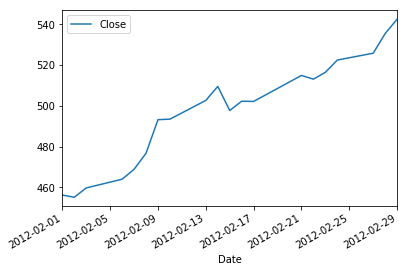

In [43]:
temp_df1.plot(x='Date',y='Close')

In [58]:
sc.defaultParallelism

4

In [57]:
sc.defaultMinPartitions

2